In [2]:
# Librerias
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture, metrics
from sklearn.preprocessing import StandardScaler

In [3]:
## Datasets
np.random.seed(0)  
n_samples = 1500  # numero total de muestras por dataset

# Crearemos 6 datasets
X = 6*[None]

# Circulos concéntricos 
xtemp, _ = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
X[0] = StandardScaler().fit_transform(xtemp)

# Lunas
xtemp, _ = datasets.make_moons(n_samples=n_samples, noise=.05)
X[1] = StandardScaler().fit_transform(xtemp)

# Blobs (es un problema que podriamos decir que es linealmente separable)
xtemp, _ = datasets.make_blobs(n_samples=n_samples, random_state=8)
X[2] = StandardScaler().fit_transform(xtemp)

# Plano sin agrupaciones (No tiene clusters)
xtemp = np.random.rand(n_samples, 2)
X[3] = StandardScaler().fit_transform(xtemp)

# Blobs con deformacioon anisotropica (BLobs estirados y escalados)
xtemp, _= datasets.make_blobs(n_samples=n_samples, random_state=170)
xtemp = np.dot(xtemp, [[0.6, -0.6],[-0.4, 0.8]])  # lo multiplicamos para alargar y deformar los blobs
X[4] = StandardScaler().fit_transform(xtemp)

# Blobs con varias varianzas
xtemp, _ = datasets.make_blobs(n_samples=n_samples,cluster_std=[1.0,2.5,0.5], random_state=142)
X[5] = StandardScaler().fit_transform(xtemp)

# numero de clusters por cada dataset
clases = [2,2,3,3,3,3]


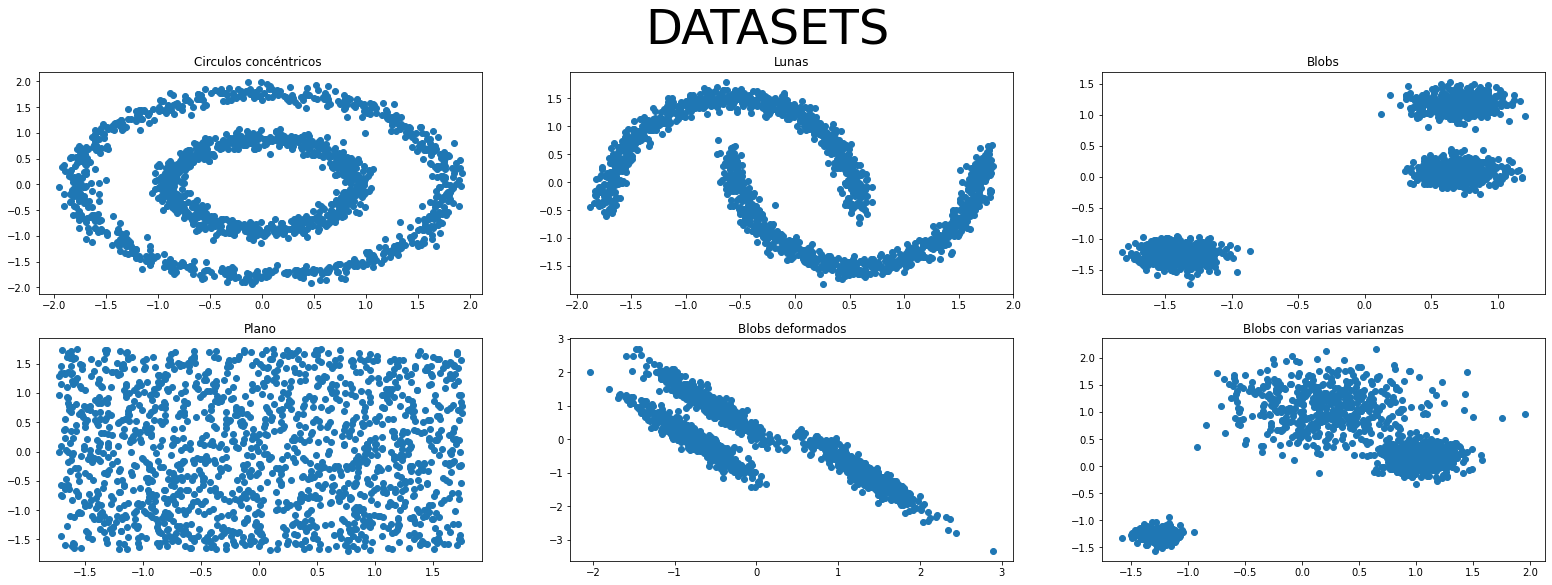

In [43]:
## Visualizar los datos
fig = plt.figure(figsize=(27, 9))
fig.suptitle('DATASETS', fontsize=48)

# Subtitulos
datasetTitle = ['Circulos concéntricos ', 'Lunas', 'Blobs', 'Plano', 'Blobs deformados', 'Blobs con varias varianzas'] 

for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    plt.title(datasetTitle[i])
    ax.scatter(X[i][:, 0], X[i][:,1])

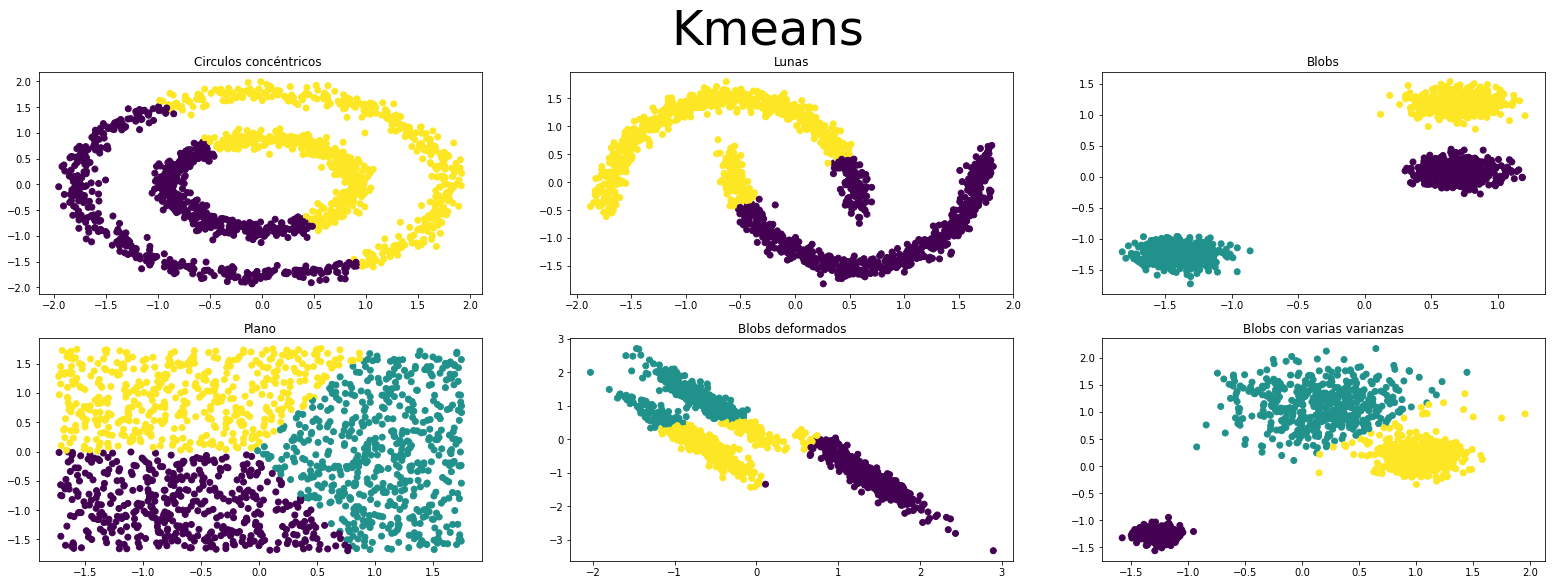

In [44]:
### KMeans
y = []  # guardaremos el cluster al que pertenece cada punto por cada dataset   
for c, x in zip(clases, X):
    model = cluster.KMeans(n_clusters=c)
    
    model.fit(x)       # entrena
            
    if hasattr(model, 'labels_'):
        y.append(model.labels_.astype(np.int)) # agrega las etiquetas de cada punto
    else:
        y.append(model.predict(x))    
        
        
# por ejemplo y[0] tendra 1500 etiquetas y cada una de esas etiquetas dicta 
# a que cluster pertenece el punto en el indice correspondiente, al cluster 0, 1, 2, etc. 
# dependiendo de cuantos clusters tenga nuestro problema.
#       y[0] = [1,1,0,1,2,.....,0,1,2] <-> ejemplo

fig = plt.figure(figsize=(27, 9))
fig.suptitle('Kmeans', fontsize=48)
for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    plt.title(datasetTitle[i])  # agrega titulo a cada subplot
    ax.scatter(X[i][:, 0], X[i][:, 1], c=y[i])


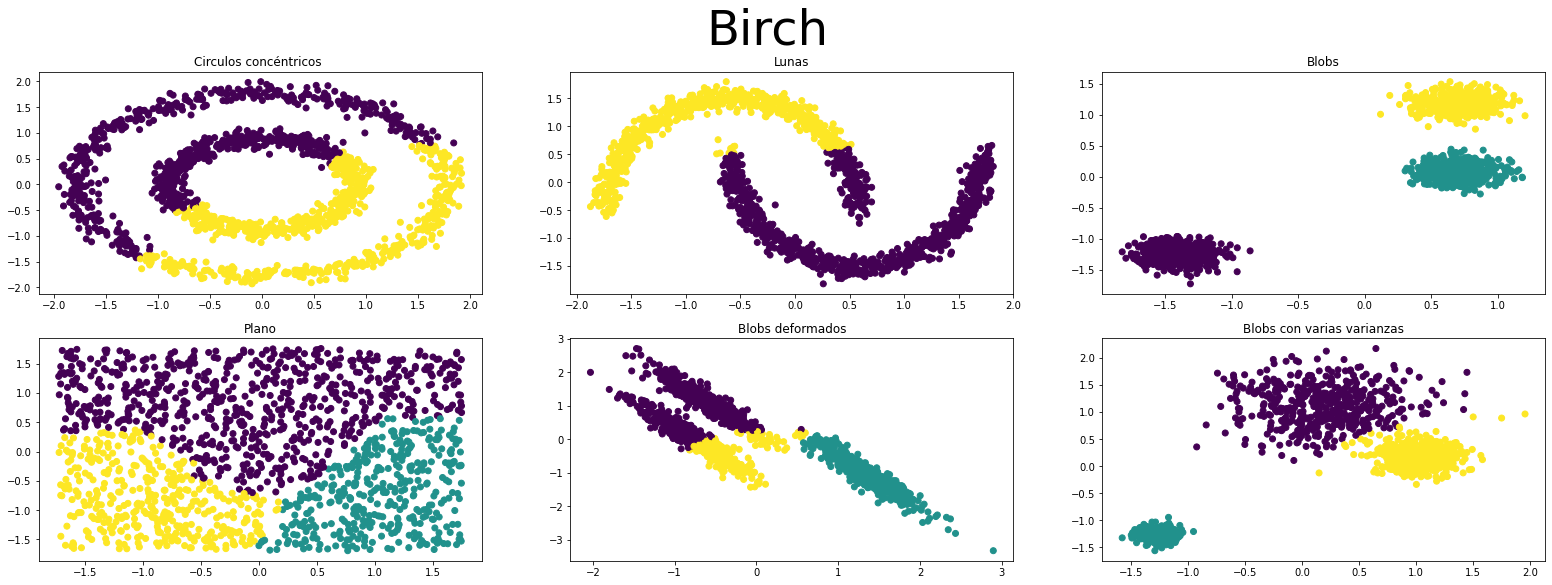

In [46]:
### Birch

## Es muy parecido a Kmeans
y = []       
for c, x in zip(clases, X):
    model = cluster.Birch(n_clusters=c)
    model.fit(x)
    if hasattr(model, 'labels_'):
        y.append(model.labels_.astype(np.int))
    else:
        y.append(model.predict(x))


fig = plt.figure(figsize=(27, 9))
fig.suptitle('Birch', fontsize=48)
for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    plt.title(datasetTitle[i])  # agrega titulo a cada subplot
    ax.scatter(X[i][:, 0], X[i][:, 1], c=y[i])

C:\Users\acer\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Users\acer\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Users\acer\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


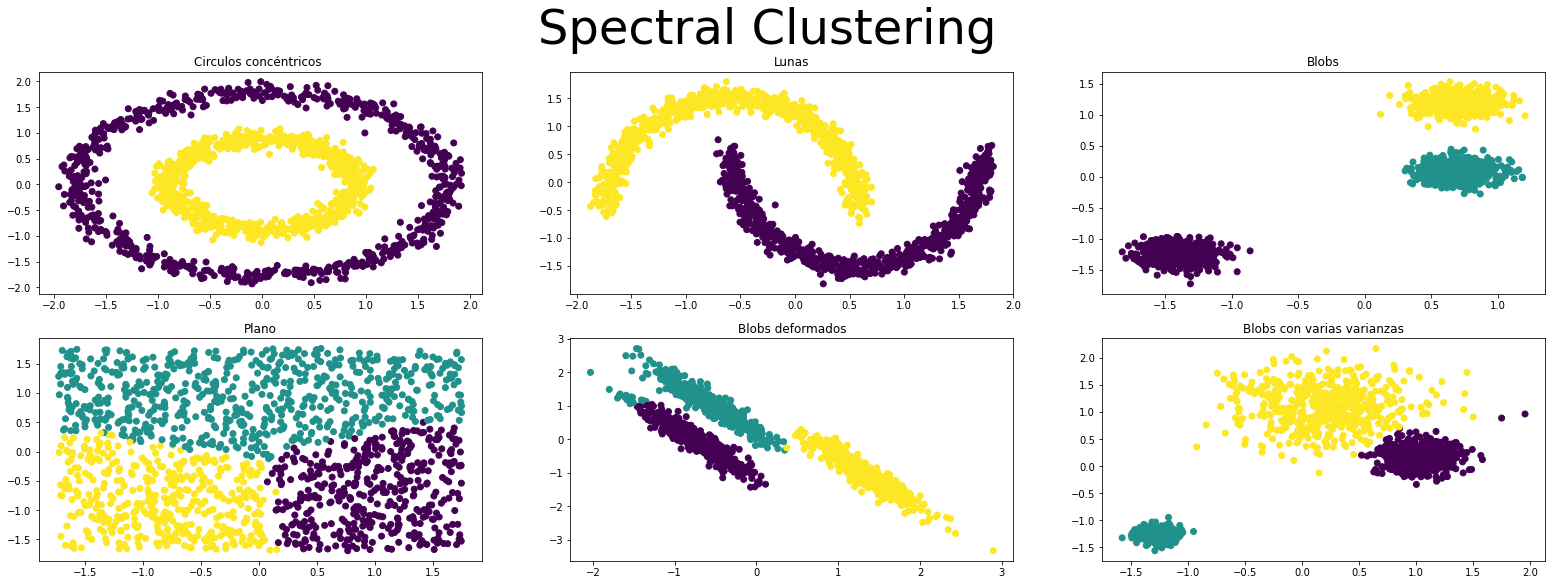

In [47]:
### Spectral clustering
y = []       
for c, x in zip(clases, X):
    model = cluster.SpectralClustering(n_clusters=c, affinity="nearest_neighbors")
    model.fit(x)
    if hasattr(model, 'labels_'):
        y.append(model.labels_.astype(np.int))
    else:
        y.append(model.predict(x))


### Spectral clustering lo hace muy bien para circulos concentricos, las lunas, blobs, blobs con varias varianzas
fig = plt.figure(figsize=(27, 9))
fig.suptitle('Spectral Clustering', fontsize=48)
for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    plt.title(datasetTitle[i])  # agrega titulo a cada subplot
    ax.scatter(X[i][:, 0], X[i][:, 1], c=y[i])
    
    

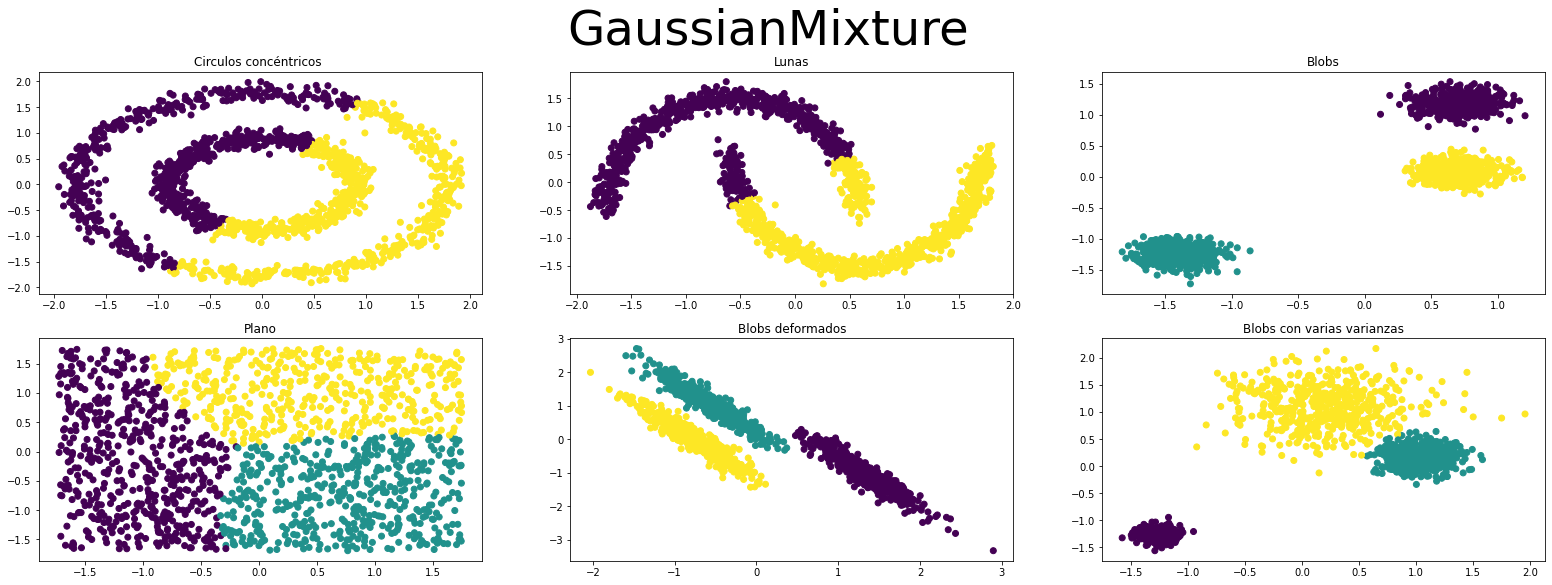

In [48]:
### Mezclas Gausianas
y = []       
for c, x in zip(clases, X):
    model = mixture.GaussianMixture(n_components=c, covariance_type='full')
    model.fit(x)
    if hasattr(model, 'labels_'):
        y.append(model.labels_.astype(np.int))
    else:
        y.append(model.predict(x))

# lo hace muy bien para los blobs: los deformados o alargados, los normales y los da varias varianzas

fig = plt.figure(figsize=(27, 9))
fig.suptitle('GaussianMixture', fontsize=48)
for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    plt.title(datasetTitle[i])  # agrega titulo a cada subplot
    ax.scatter(X[i][:, 0], X[i][:, 1], c=y[i])

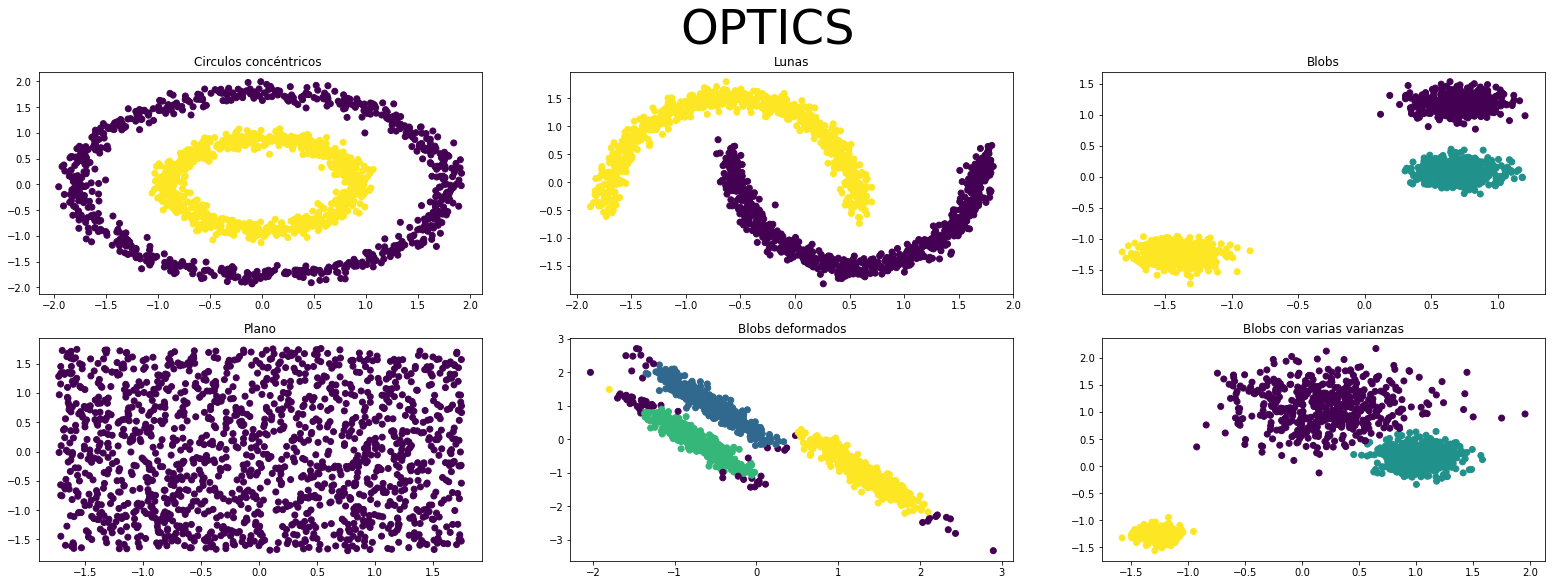

In [49]:
### Optics
y = []       
for c, x in zip(clases, X):
    model = cluster.OPTICS(min_samples=20, xi=0.05, min_cluster_size=0.1)
    model.fit(x)
    if hasattr(model, 'labels_'):
        y.append(model.labels_.astype(np.int))
    else:
        y.append(model.predict(x))

# Esta tecnica lo hace muy bien para todos los datasets, quiza no tanto en los blobs deformados.
# vemos que en el dataset del plano lo hace muy bien ya que no hay cluster como tal.

fig = plt.figure(figsize=(27, 9))
fig.suptitle('OPTICS', fontsize=48)
for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    plt.title(datasetTitle[i])  # agrega titulo a cada subplot
    ax.scatter(X[i][:, 0], X[i][:, 1], c=y[i])

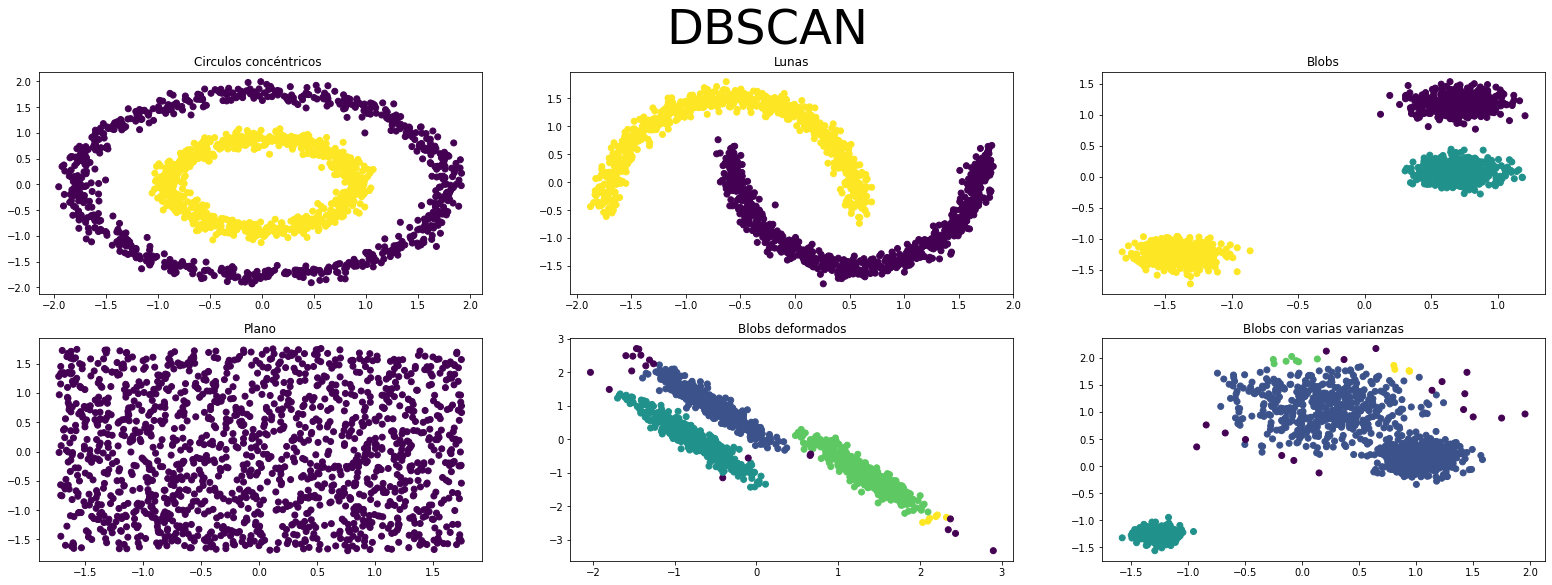

In [50]:
### DBSCAN
y = [] 
eps = [0.3, 0.3, 0.3, 0.3, 0.15, 0.18]

for c, x, e in zip(clases, X, eps):
    model = cluster.DBSCAN(eps=e)
    model.fit(x)
    if hasattr(model, 'labels_'):
        y.append(model.labels_.astype(np.int))
    else:
        y.append(model.predict(x))

## Esta tecnia tambuen es muy buena, vemos que al igual que OPTICS soluciona bien el dataset del plano, aunque en 
# el dataset de blobs con varias varianzas no agrupa todos los puntos en su cluster correspondiente.

fig = plt.figure(figsize=(27, 9))
fig.suptitle('DBSCAN', fontsize=48)
for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    plt.title(datasetTitle[i])  # agrega titulo a cada subplot
    ax.scatter(X[i][:, 0], X[i][:, 1], c=y[i])